## Importing Libraries :

#### Basic Python Libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Preprocessing  Libraries: 

In [2]:
import json
import string
import nltk
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

#### Deep Learning Libraries: 

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model

## Loading Itents Data :

In [4]:
dataset = json.loads(open("Intent_final_version.json").read())
dataset

{'intents': [{'intent': 'Greetings',
   'text': ['Hello',
    'Hi',
    'Hello, I have some questions related to breast cancer',
    'Hello!',
    'Hi there!',
    'Hello, how are you ?',
    'how are you ?',
    'Hi there',
    "Hi there, how's it going ?",
    "Hey, what's up ?",
    'Good morning',
    'Good afternoon',
    'Good evening',
    'Hola',
    'Hi sir'],
   'responses': ["Hello! Thank you for reaching out. I'm here to provide support and information regarding breast cancer.",
    "Hi there! Welcome to our breast cancer support chat. I'm here to assist you in any way I can.",
    "Welcome! I'm glad you're here. Feel free to ask me anything about breast cancer.",
    "Hello! I'm here to offer assistance and guidance on breast cancer-related topics. How can I assist you today?",
    "Hi! Thank you for reaching out. I'm here to provide support and answer your questions about breast cancer."]},
  {'intent': 'Name',
   'text': ['What is your name ?',
    "What's your name ?",


In [5]:
tags = []
inputs = []
responses={}

for intent in dataset['intents']:
    responses[intent['intent']] = intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        tags.append(intent['intent'])

In [6]:
data = pd.DataFrame({"inputs":inputs, "tags":tags})
data

,inputs,tags
0,Hello,Greetings
1,Hi,Greetings
2,"Hello, I have some questions related to breast...",Greetings
3,Hello!,Greetings
4,Hi there!,Greetings
...,...,...
247,Can genetic factors influence breast cancer ri...,Prevention
248,How does family history impact breast cancer r...,Prevention
249,Is there anything I can do to reduce my risk o...,Prevention
250,What are the recommendations for breast cancer...,Prevention


## Data Processing :

In [7]:
data['inputs'] = data['inputs'].apply(lambda sequence:
                                      [ltrs.lower() for ltrs in sequence if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hello,Greetings
1,hi,Greetings
2,hello i have some questions related to breast ...,Greetings
3,hello,Greetings
4,hi there,Greetings
...,...,...
247,can genetic factors influence breast cancer risk,Prevention
248,how does family history impact breast cancer r...,Prevention
249,is there anything i can do to reduce my risk o...,Prevention
250,what are the recommendations for breast cancer...,Prevention


In [8]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data["inputs"])
train = tokenizer.texts_to_sequences(data["inputs"])
x_train = pad_sequences(train)
x_train

array([[  0,   0,   0, ...,   0,   0,  69],
       [  0,   0,   0, ...,   0,   0,  60],
       [  0,   0,   0, ...,  19,   1,   2],
       ...,
       [ 15,  38, 285, ...,  28,  22, 154],
       [  0,   0,   0, ...,  96,  29, 152],
       [  0,   0,   0, ...,   1,   2,  50]], dtype=int32)

In [9]:
le = LabelEncoder()
y_train = le.fit_transform(data["tags"])
y_train 

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 12, 12, 12, 12, 12,
       12, 12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,  7,  7,  7,
        7,  7,  7,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

19


In [11]:
unique_words = len(tokenizer.word_index)
output_length = le.classes_.shape[0]
print("unique words: ", unique_words)
print("output length: ", output_length)

unique words:  292
output length:  15


## LSTM Modelization :

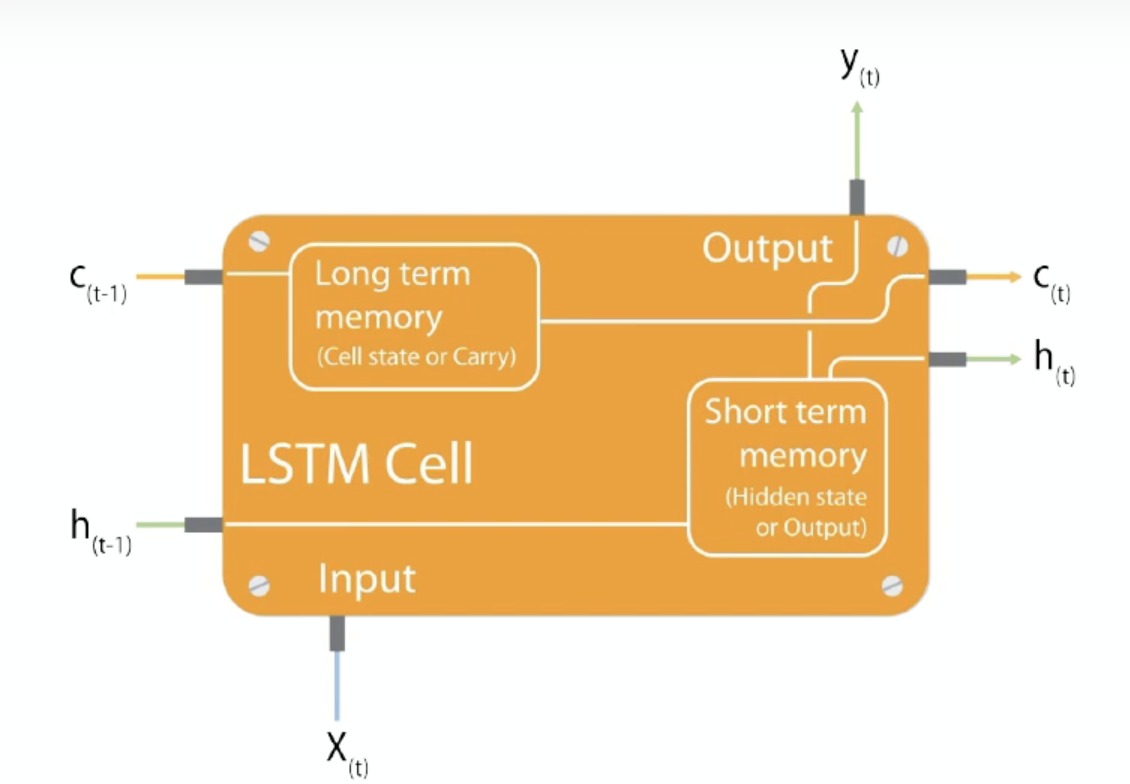

In [12]:
model = tf.keras.Sequential()
model.add(Input(shape=(input_shape,)))
model.add(Embedding(unique_words+1, 10, input_length= (input_shape,)))
model.add(LSTM(30, return_sequences=True))
model.add(Flatten())
model.add(Dense(units= 10, activation='relu'))
model.add(Dense(units= 5, activation='relu'))
model.add(Dense(units= output_length, activation='softmax'))

/Users/adnanederoui/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer ='adam', metrics=['accuracy'])

In [14]:
algo = model.fit(x_train, y_train, epochs=600)

Epoch 1/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0730 - loss: 2.7067  
Epoch 2/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1126 - loss: 2.6975 
Epoch 3/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1244 - loss: 2.6751 
Epoch 4/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1260 - loss: 2.6229 
Epoch 5/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1038 - loss: 2.5702 
Epoch 6/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1149 - loss: 2.5271 
Epoch 7/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1649 - loss: 2.4496 
Epoch 8/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1369 - loss: 2.4346 
Epoch 9/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1573 - loss: 2.3136 
Epoch 10/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1606 - loss: 2.3205 
Epoch 11/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2702 - loss: 2.2350 
Epoch 12/600
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2756 - lo

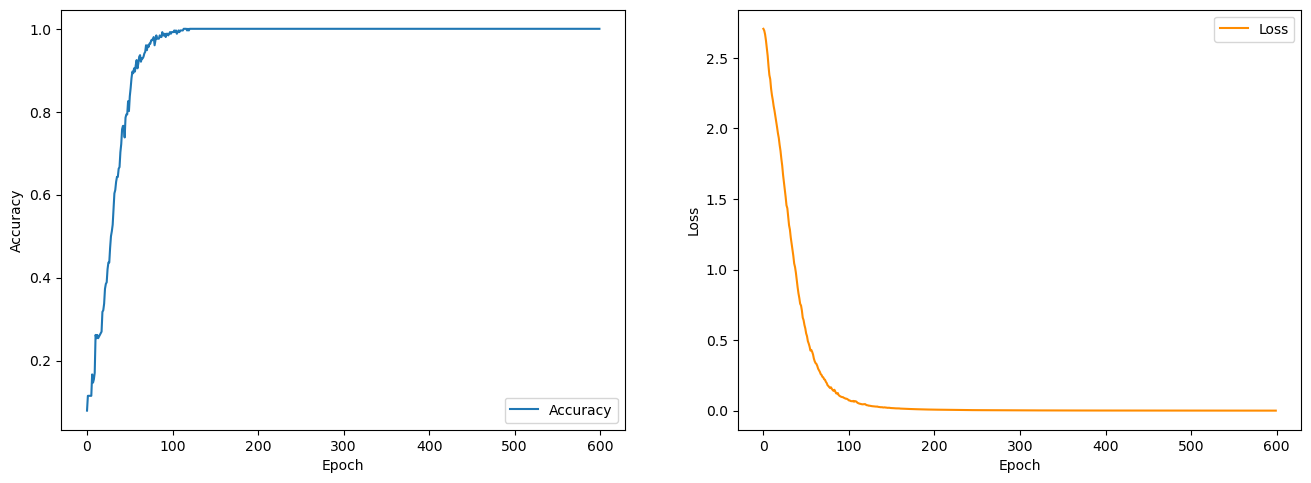

In [15]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.plot(algo.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])

plt.subplot(2, 2, 2)
plt.plot(algo.history['loss'], c="darkorange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Loss"])

plt.show()

## Predictions :

In [ ]:
while True : 
    text_list = []
    user_input = input("You: ")
    prediction_input = []
    
    for letter in user_input: 
        if letter not in string.punctuation: 
            prediction_input.append(letter.lower())
    
    prediction_input = "".join(prediction_input)
    text_list.append(prediction_input)
    
    prediction_input = tokenizer.texts_to_sequences(text_list)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)
    
    output = model.predict(prediction_input)
    output = output.argmax()
    
    response_tag = le.inverse_transform([output])[0]
    print("DeepCare_bot: ", random.choice(responses[response_tag]))
    if user_input == 'end chat':
        break